In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import os
from IPython.display import display, clear_output
import scipy.optimize as spo
import iminuit
import uproot
import json
import multiprocessing as mp
import time
from scipy.optimize import curve_fit
import simulation_utility as su

In [30]:
def simulation_analysis(voltage=15,nfile=2000,process=True):
    file_number_range = range(1,nfile)
    main_path = f'/home/pieramico/ABALONELYSO/ABALONE_{voltage}kV/results/'
    print('file in',main_path)
    save_path = f'ABALONE_{voltage}kV/'
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    if process: pe1_ang0 = su.track_and_readout(1,0,file_number_range,main_path,save_path)
    su.plot_spectra(save_path,xlim = (200,3000), bins = 6000 )
    stat = su.e_stat_bootstrap(save_path)
    return stat

file in /home/pieramico/ABALONELYSO/ABALONE_17kV/results/
Results with 1 PE at angle 0 deg


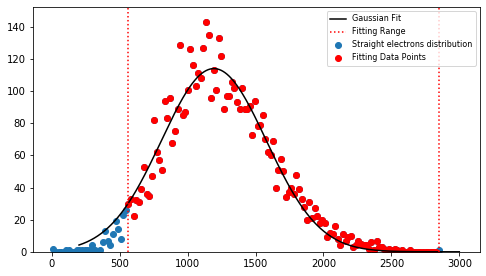

 ** Summary of the electrons ** 
Total electrons: 9995
Portion of straight electrons: 0.57
Portion of returning back-scattered electrons: 0.06
Portion of non-returning back-scattered electrons: 0.34
Portion of back-scattered electrons (returning+non-returning): 0.40
Portion of undetected electrons: 0.03


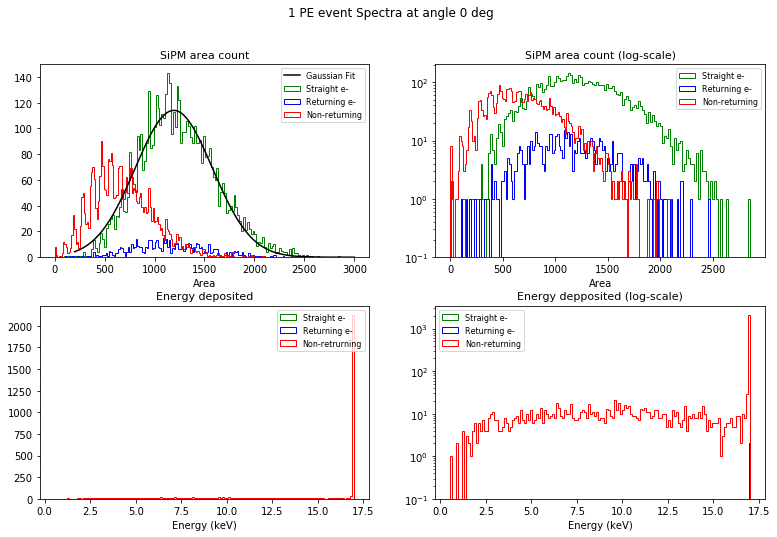

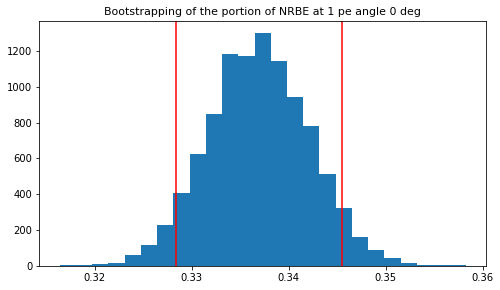

In [31]:
stat_17 = simulation_analysis(voltage=17,process=0)

file in /home/pieramico/ABALONELYSO/ABALONE_18kV/results/
Results with 1 PE at angle 0 deg


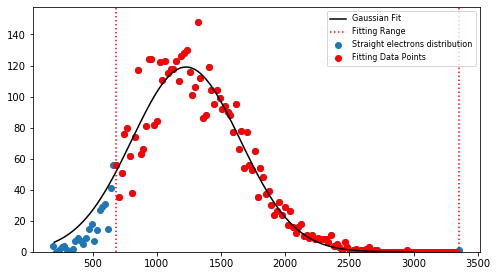

 ** Summary of the electrons ** 
Total electrons: 9995
Portion of straight electrons: 0.57
Portion of returning back-scattered electrons: 0.06
Portion of non-returning back-scattered electrons: 0.34
Portion of back-scattered electrons (returning+non-returning): 0.40
Portion of undetected electrons: 0.03


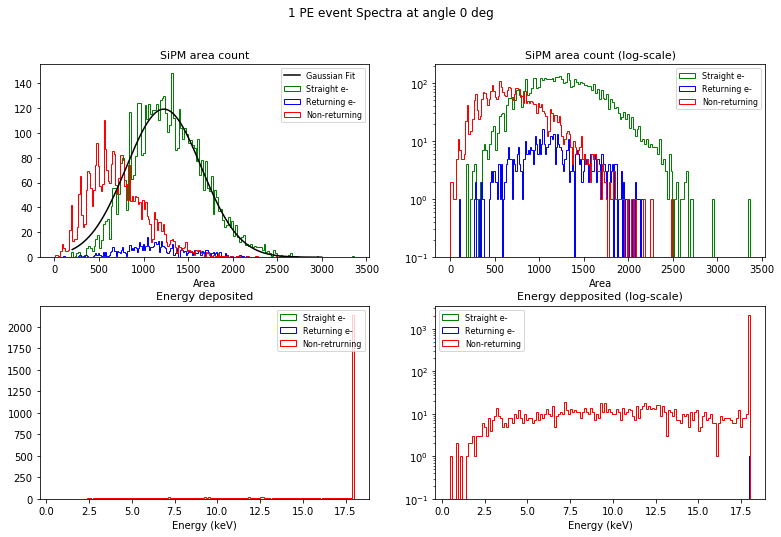

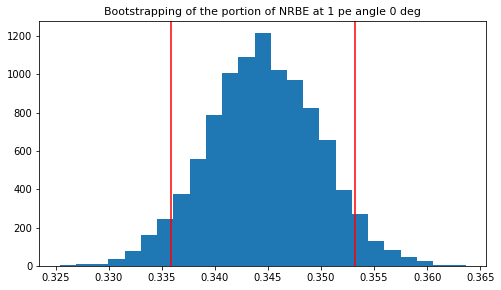

In [32]:
stat_18 = simulation_analysis(voltage=18,process=0)

In [34]:
stat_19 = simulation_analysis(voltage=19,nfile=200)

file in /home/pieramico/ABALONELYSO/ABALONE_19kV/results/
Initializing 1 pe, at angle 0


ValueError: Length of values does not match length of index

file in /home/pieramico/ABALONELYSO/ABALONE_20kV/results/
Results with 1 PE at angle 0 deg


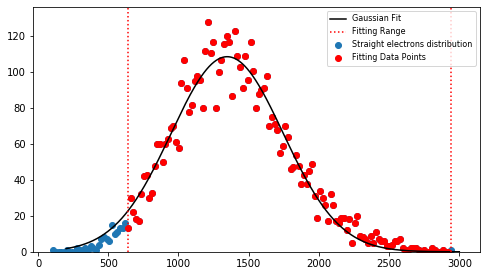

 ** Summary of the electrons ** 
Total electrons: 9995
Portion of straight electrons: 0.57
Portion of returning back-scattered electrons: 0.05
Portion of non-returning back-scattered electrons: 0.35
Portion of back-scattered electrons (returning+non-returning): 0.41
Portion of undetected electrons: 0.02


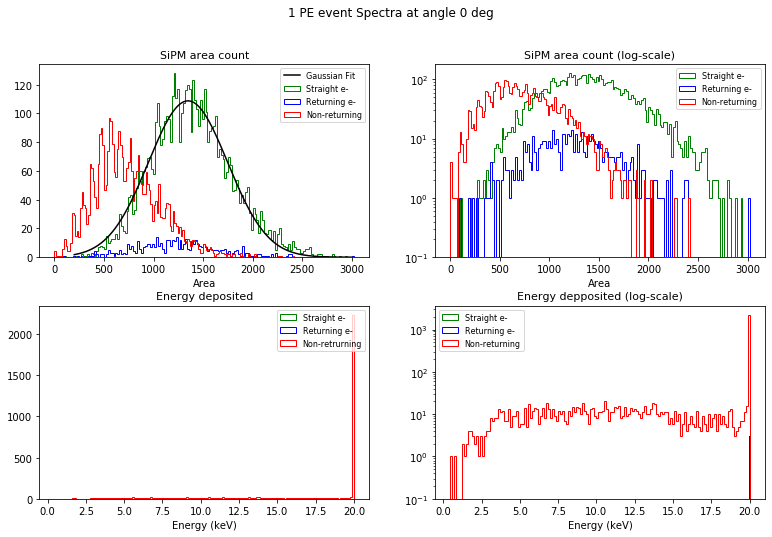

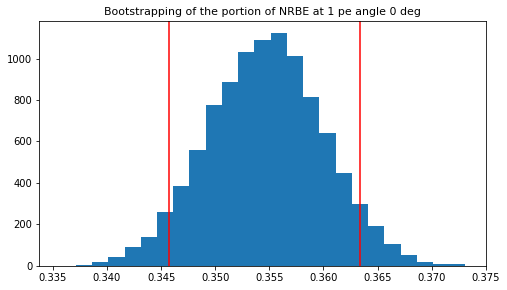

In [33]:
stat_20 = simulation_analysis(voltage=20,process=0)

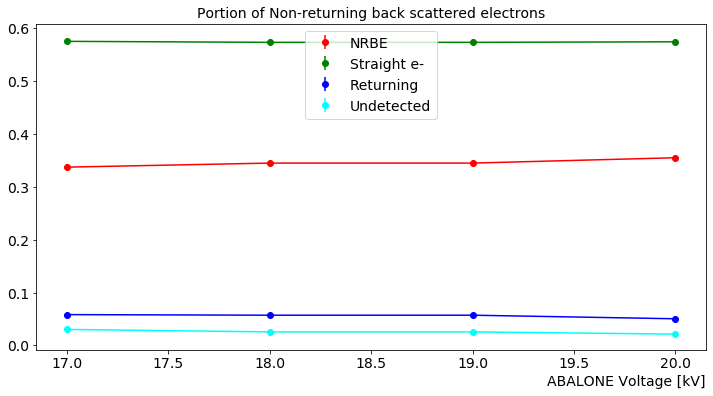

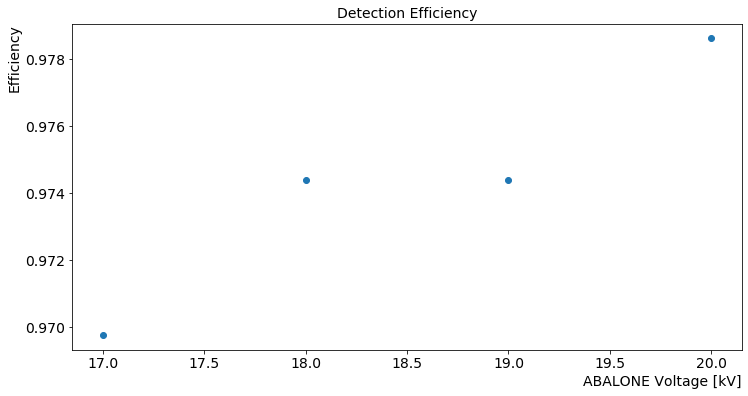

In [41]:
stat_set = [stat_17,stat_18,stat_18,stat_20]

SE = [i[0][0] for i in stat_set]
SE_var = [i[0][3] for i in stat_set]
RE = [i[1][0] for i in stat_set]
RE_var = [i[1][3] for i in stat_set]
NRBE = [i[2][0] for i in stat_set]
NRBE_var = [i[2][3] for i in stat_set]
NE = [i[3][0] for i in stat_set]
NE_var = [i[3][3] for i in stat_set]

voltage = [17,18,19,20]
plt.figure(figsize=(12,6))
plt.errorbar(voltage,NRBE,yerr=NRBE_var,fmt='o',label="NRBE",color="Red")
plt.errorbar(voltage,SE,yerr=SE_var,fmt='o',label="Straight e-",color="Green")
plt.errorbar(voltage,RE,yerr=RE_var,fmt='o',label="Returning",color="Blue")
plt.errorbar(voltage,NE,yerr=NE_var,fmt='o',label="Undetected",color="cyan")

plt.plot(voltage,NRBE,color="Red")
plt.plot(voltage,SE,color="Green")
plt.plot(voltage,RE,color="Blue")
plt.plot(voltage,NE,color="cyan")
#plt.ylim(0,1)
#plt.xlim(-0.5,90)

plt.title("Portion of Non-returning back scattered electrons",size=14)
plt.xlabel('ABALONE Voltage [kV]',ha='right',x=1,fontsize=14)
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.legend(fontsize=14)
#path = "./plots/NRBE/"
#plt.savefig(path+"Portion",transparent=False)

plt.figure(figsize=(12,6))
eff = np.array([stat_17[3][0],stat_18[3][0],stat_18[3][0],stat_20[3][0]])
plt.plot(np.array([17,18,19,20]),1-eff,'o')
plt.title("Detection Efficiency",size=14)
plt.xlabel('ABALONE Voltage [kV]',ha='right',x=1,fontsize=14)
plt.ylabel('Efficiency',ha='right',y=1,fontsize=14)
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
#plt.ylim(0.,1.1)
#path = "./plots/NRBE/"
#plt.savefig(path+"Detector_Efficiency",transparent=False)